<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Web APIs & NLP on Subreddit (CatAdvice & DogAdvice)

--- 
# Part 2

Part 2 contains problem statement, background, data cleaning and exploratory data analysis.


---

## Problem Statement

An influx of inexperienced pets owners overly reliant on vets and pet store reduces work efficiency, how can we optimize it?

Our flagship product (Pet Companions), our highly-rated mobile application offering pet owners information through:
- AI-powered chatbot 
 - First level of customer inquiry
 - Source of information for pet owners
- Recommends articles based on classification of queries
- A knowledge-bank filled with information sourced from vets, pet experts and users

However, our chatbot requires an update to increase its effectiveness in order to meet higher demand.

We aim to use web apis and NLP to create an improved classifier model to better classify posts under cats and dogs and recommend information to pet owners accordingly.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis & Visualisaion](#Exploratory-Data-Analysis-and-Visualisation)
- [Data Dictionary](#Data-Dictionary)

## Background

Our company, Smart Pet was established in August 2017 to improve animal welfare for pets in Singapore via the usage of technology. Many pets in Singapore were not being properly taken care of as (new) owners may not be experience. We have previously worked with organisations such as SPCA, AVA and petslovers to create a mobile application with chatbot to address the queries on pets. 

As we are steadily easing into a COVID-19 adjusted future, we must remember how it has affected us during the initial outbreak. Circuit breakers in Singapore meant less social interactions. As such, many Singaporeans turn to the companionship of pets to cope with the change. According to statisa, we can observe that majority of commonly acquired animals are dogs and cats. Dogs dominate the majority of households at 57% while coming second is cats at a 27%. Regardless of COVID, we can also see that pet ownership has been steadily increasing in Singapore as reference with the number of foreign animal import in Singapore. However, with the rise of pet ownership meant more first time fur parents which are commonly inexperienced pet owners.

### Data Source

Source: Pushshift Reddit API

* [`cat_adv.csv`](../data/cat_adv.csv): Extracted data from r/CatAdvice on 25 Nov 2022 with 4247 posts.
* [`dog_adv.csv`](../data/dog_adv.csv): Extracted data from r/DogAdvice on 25 Nov 2022 with 4000 posts.

### Outside Research

One of the most common complaints of pet parents is that their dogs are disruptive or destructive when left alone.
https://www.aspca.org/pet-care/dog-care/common-dog-behavior-issues/separation-anxiety

Possible Health Issues in Common Dog Breeds (America)
https://www.healthline.com/health/dog-breeds-and-health-issues#german-shepherd

Walking your dog provides mental stimulation, physical exercise, chances for socialization, and opportunities for behavioral training. 
https://animalfoundation.com/whats-going-on/blog/importance-walking-your-dog

Cat's behavior https://petcosset.com/why-does-my-cat-swat-at-me-when-i-walk-by/

## Data Import and Cleaning

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
## Set display setting for dataframe

pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 20)
# this setting widens how many characters pandas will display in a column:
pd.set_option('display.max_colwidth', 400)

In [3]:
# Import data

cat_adv = pd.read_csv('../data/cat_adv.csv')
dog_adv = pd.read_csv('../data/dog_adv.csv')

#### Data cleaning for cat_adv

In [4]:
# Display summary of the column non-null count and dtype

cat_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  4247 non-null   object 
 1   allow_live_comments            4247 non-null   bool   
 2   author                         4247 non-null   object 
 3   author_flair_css_class         0 non-null      float64
 4   author_flair_richtext          4242 non-null   object 
 5   author_flair_text              33 non-null     object 
 6   author_flair_type              4242 non-null   object 
 7   author_fullname                4242 non-null   object 
 8   author_is_blocked              4247 non-null   bool   
 9   author_patreon_flair           4242 non-null   object 
 10  author_premium                 4242 non-null   object 
 11  awarders                       4247 non-null   object 
 12  can_mod_post                   4247 non-null   b

In [5]:
# Display first 5 rows of cat_adv dataframe
cat_adv.head()

all_awardings  allow_live_comments             author  \
0            []                False      billyandteddy   
1            []                False      SonOfThanatos   
2            []                False           EvaUrzey   
3            []                False        blackwidovv   
4            []                False  ladymargarine5813   

   author_flair_css_class author_flair_richtext author_flair_text  \
0                     NaN                    []               NaN   
1                     NaN                    []               NaN   
2                     NaN                    []               NaN   
3                     NaN                    []               NaN   
4                     NaN                    []               NaN   

  author_flair_type author_fullname  author_is_blocked author_patreon_flair  \
0              text     t2_3j2vrd19              False                False   
1              text        t2_9xxz3              False                False   
2              text     t2_5zx0eyca              False                False   
3              text     t2_28zoyd9r              False                False   
4              text     t2_ug9yqp21              False                False   

  author_premium awarders  can_mod_post  contest_mode  created_utc  \
0          False       []         False         False   1669252265   
1          False       []         False         False   1669251120   
2          False       []         False         False   1669249971   
3          False       []         False         False   1669249517   
4          False       []         False         False   1669248783   

           domain  \
0  self.CatAdvice   
1  self.CatAdvice   
2  self.CatAdvice   
3  self.CatAdvice   
4  self.CatAdvice   

                                                                                             full_link  \
0  https://www.reddit.com/r/CatAdvice/comments/z369at/transporting_cats_on_a_35_hr_drive_to_move_to_a/   
1    https://www.reddit.com/r/CatAdvice/comments/z35urf/my_cat_wont_eat_vet_determined_he_is_not_sick/   
2  https://www.reddit.com/r/CatAdvice/comments/z35g4x/two_6_month_old_outdoor_kittens_one_injured_one/   
3  https://www.reddit.com/r/CatAdvice/comments/z35age/new_cat_was_eating_but_isnt_eating_anymore_plus/   
4                                     https://www.reddit.com/r/CatAdvice/comments/z350nr/cat_bullying/   

  gildings      id  is_created_from_ads_ui  is_crosspostable  is_meta  \
0       {}  z369at                   False              True    False   
1       {}  z35urf                   False             False    False   
2       {}  z35g4x                   False             False    False   
3       {}  z35age                   False             False    False   
4       {}  z350nr                   False              True    False   

   is_original_content  is_reddit_media_domain  is_robot_indexable  is_self  \
0                False                   False                True     True   
1                False                   False               False     True   
2                False                   False               False     True   
3                False                   False               False     True   
4                False                   False                True     True   

   is_video link_flair_background_color  \
0     False                     #80d323   
1     False                     #0dd3bb   
2     False                     #ff4500   
3     False                     #b374e7   
4     False                     #0dd3bb   

                                  link_flair_richtext  \
0                     [{'e': 'text', 't': 'General'}]   
1             [{'e': 'text', 't': 'Nutrition/Water'}]   
2  [{'e': 'text', 't': 'CW: Graphic injuries/death'}]   
3   [{'e': 'text', 't': 'Sensitive/Seeking Support'}]   
4                  [{'e': 'text', 't': 'Behavioral'}]   

                 link_flair_template_id             link

In [6]:
## Drop rows with NA and [removed] for selftext column

# Drop rows with NA in selftext - as posts were likely to lack information for advice
cat_adv.dropna(subset = 'selftext', inplace=True)

# Drop rows with '[remvoed]' in selftext - as posts were removed by moderators due to reasons such as spam, wrong topics etc
cat_adv.drop(cat_adv[cat_adv.selftext == '[removed]'].index, inplace=True)

In [7]:
## Feature engineering

# Combine text in title and selftext as some may have included information in both title and self text
cat_adv['title_selftext'] = cat_adv['title'] + " " + cat_adv['selftext']

In [8]:
# Get total number of characters in title and selftext 

cat_adv['len_title_selftext'] = cat_adv.title_selftext.apply(len)

In [9]:
# Get total number of words in title and selftext

cat_adv['word_counts'] = cat_adv.title_selftext.apply(lambda x: len(x.split()))

In [10]:
# Categorise 'CatAdvice' as 1 in subreddit_target while 'DogAdvice' will be 0. 

cat_adv['subreddit_target'] = 1

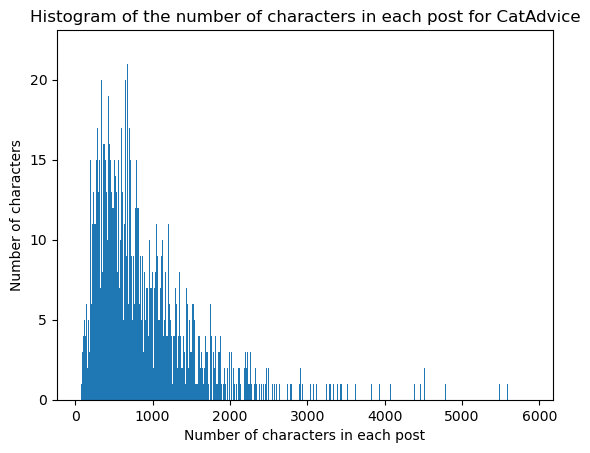

In [11]:
# Histogram of the number of characters in each post

plt.hist(cat_adv.len_title_selftext, bins =1000)
plt.xlabel('Number of characters in each post')
plt.ylabel('Number of characters')
plt.title('Histogram of the number of characters in each post for CatAdvice')

plt.show()

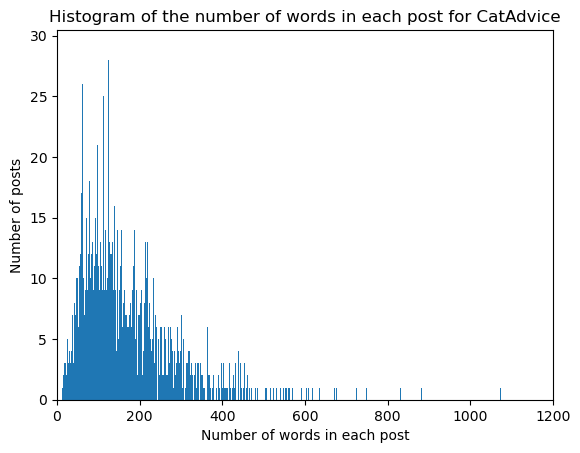

In [12]:
# Histogram of the number of words in each post

plt.hist(cat_adv.word_counts, bins =1000)
plt.xlabel('Number of words in each post')
plt.ylabel('Number of posts')
plt.xlim(0,1200)
plt.title('Histogram of the number of words in each post for CatAdvice')

plt.show()

##### Interpretation for histograms for characters and words in each post for CatAdvice

- Both histograms are right-skewed distribution. It is expected. There might be correlation with attention span and how much each individual is willing to spend time on writing a post. There are outliers with long posts.

In [13]:
# Sort the df based on word_counts
cat_adv_sorted = cat_adv.sort_values(by=['word_counts'])

In [14]:
# Display rows with the least word counts
cat_adv_sorted[['title_selftext']].head()

title_selftext
3964     Weren't you afraid of complications when you spayed your cats? .
2277  Pumpkins daily for kittens? Is there any harm? My kitten loves them
2295  Source for GS441? Is there a source to buy this that's been tested?
3061             Dry food Is it normal for a kitten to not like dry food?
3975             How can I cut her nails? She doesn't let me do it at all

In [15]:
# Display rows with the most word counts
cat_adv_sorted[['title_selftext']].tail()

title_selftext
765   How to deal with cat being not affectionate? Hi everyone!\n\nI’m coming to the wonderful Reddit community today as I fear I’m going slightly insane and I could really do with some advice. Details below:\n\nI grew up with cats, all of them with different personalities (as they tend to have) and I really missed having that fun feline companionship once I moved out almost 9 years ago. For years a...
1399  I can't seem to make a decision regarding the kitten I adopted. I don't want to return him to the rescue and regret it, but I also don't want to keep him away from a home that would appreciate him more. I adopted a 4.5 month old kitten two weeks ago. He is very sweet, cuddly, and energetic! I am having so many mixed feelings about him though. **TLDR at the bottom**\n\n&amp;#x200B;\n\nTo start,...
2859  Having second thoughts about getting a second cat A little backstory, we grew up with cats all around us as kids on a farm. But from 2016 ish to 2020 I didn't personally own a cat. My mom had a cat who died around 2017 or 2018 but that was her cat not mine. So for the first time in awhile I was catless, just my two dogs, a small jack russell mix and a very laid bad 7yr old aussie. During covid...
4037  Cat Introduction Success Story (I Hope!) Hey folks, I wrote a post last night but realized it was just a damn book so I deleted it.  So I'm going to share a "short" success story of how I introduced two cats both following and disregarding expert advice, lol.\n\nNew kitten, Yitzhak, arrived last Sunday, so he's spent 5 nights with us.  He's 4.5 months old, rescued with a litter of 4 others at ...
1068  Anxious new kitten owner, thinking about temporarily rehoming? Hello! I’m 22F, and recently became the owner of a 12-week-old ragdoll kitten. \n\nI am not a first-time cat owner but technically I am since living on my own away from home! I live with my friend who also has some experience owning cats with her family. \n\nI did some research into the best cat breeds to keep indoors as we live in...

##### Interpretation for posts with least number of words and most number of words
- posts with too little words are more likely to not have sufficient information.
- posts with too many words are more likely to have too many irrelevant information.

In [16]:
# Display the number of rows and columns
cat_adv.shape

(2481, 78)

In [17]:
## To reduce the number of posts to 2300 
## so as to standardise the number of posts to be same with the number of posts from DogAdvice
## by removing tail ends of the posts based on word counts
## Rationale: 
## - posts with too little words are more likely to not have sufficient information
## - posts with too many words are more likely to have too many irrelevant information

# Save trimmed df with only 2300 posts by filtering out the tail ends based on word counts
cat_adv_trim = cat_adv_sorted[90:2390]

In [18]:
# Display number of rows and columns after trimming
cat_adv_trim.shape

(2300, 78)

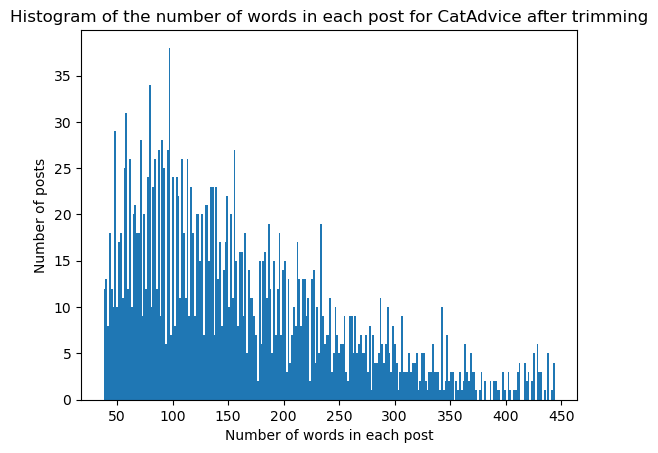

In [19]:
# Histogram of the number of words in each post after trimming

plt.hist(cat_adv_trim.word_counts, bins = 250)
plt.xlabel('Number of words in each post')
plt.ylabel('Number of posts')
plt.title('Histogram of the number of words in each post for CatAdvice after trimming')

plt.show()

In [20]:
## Create function to clean text
# To remove odd expression, punctuation and digits. 
# Transform with lowercase and lemmatizing

# Obtain list of stopwords
stopword = nltk.corpus.stopwords.words('english')

## Instantiate Lemmatizer
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    # Replace '\n','&amp','#x200B' with space
    text = text.replace('\n',' ')
    text = text.replace('&amp',' ')
    text = text.replace('#x200B',' ')
    
    # store character only if it is not a punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    
    # lowercase the characters
    text = text.lower()
    
    # remove all digits
    text = re.sub(pattern=r'\d+',
                         repl='',
                         string=text)
    
    # replace anything that is not a word with space
    text = re.sub(pattern=r'\W+',
                         repl=' ',
                         string=text)
    
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text_cleaned = [word for word in tokens if word not in stopword]
    
    # Remove 'cat' and 'dog' as these are the targets / predictors
    text_cleaned = [word for word in text_cleaned if word not in ['cats','cat','dogs','dog']] 
    
    # Join the words with space in between after lemmatizing
    text_cleaned = " ".join([wn.lemmatize(word) for word in text_cleaned])
    
    return text_cleaned

In [21]:
# clean text on 'title_selftext'
cat_adv_trim['cleaned_text'] = cat_adv_trim['title_selftext'].apply(lambda x: clean_text(x))

In [22]:
# Display first 5 rows of cat_adv_trim with relevant information
cat_adv_trim[['subreddit','link_flair_text','title_selftext','len_title_selftext','word_counts',
              'cleaned_text','subreddit_target']].head()

subreddit link_flair_text  \
3438  CatAdvice         General   
3487  CatAdvice      Behavioral   
61    CatAdvice      Behavioral   
48    CatAdvice         General   
2556  CatAdvice       Litterbox   

                                                                                                                                                                                                                  title_selftext  \
3438                    What’s the best kind of litter that will mask odor? New cat owner. I want to keep litter box smell under control as much as possible. \n\nwhat's the best kind of litter that will mask litter box odor?   
3487                    Hissing in the window Why does my cat hiss at people when she is in the window she is normally very good friendly and playful. I don’t understand why she exhibits this behavior. She even hissed at me!   
61                 Behaviour after neutering My cat recently got neutered. He sleeps all day and doesn’t play, eat, drink much. He goes to pee/poop about once a day. I’m worried. Is this normal? Should i take him to the vet?   
48    Air mattress protectors? Going to have an air mattress set up for awhile. I'm thinking about getting two of those mattress protectors to protect it from my cats. Do you think that would double the amount of protection?   
2556           Yesterday News alternative? My vet recommended that cat litter for the kitten we recused but it’s discontinue so is there a alternative I can use?\nThe kitten eats cat litter and chokes on it abs vomits it up.   

      len_title_selftext  word_counts  \
3438                 198           38   
3487                 200           38   
61                   205           38   
48                   218           38   
2556                 208           38   

                                                                                                                                      cleaned_text  \
3438             best kind litter mask odor new owner want keep litter box smell control much possible whats best kind litter mask litter box odor   
3487                                      hissing window hiss people window normally good friendly playful understand exhibit behavior even hissed   
61                                  behaviour neutering recently got neutered sleep day play eat drink much go peepoop day worried normal take vet   
48    air mattress protector going air mattress set awhile im thinking getting two mattress protector protect think would double amount protection   
2556                yesterday news alternative vet recommended litter kitten recused discontinue alternative use kitten eats litter choke ab vomit   

      subreddit_target  
3438                 1  
3487                 1  
61                   1  
48                   1  
2556                 1

#### Data cleaning for dog_adv

In [23]:
# Display summary of the column non-null count and dtype

dog_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  4000 non-null   object 
 1   allow_live_comments            4000 non-null   bool   
 2   author                         4000 non-null   object 
 3   author_flair_css_class         0 non-null      float64
 4   author_flair_richtext          3994 non-null   object 
 5   author_flair_text              0 non-null      float64
 6   author_flair_type              3994 non-null   object 
 7   author_fullname                3994 non-null   object 
 8   author_is_blocked              4000 non-null   bool   
 9   author_patreon_flair           3994 non-null   object 
 10  author_premium                 3994 non-null   object 
 11  awarders                       4000 non-null   object 
 12  can_mod_post                   4000 non-null   b

In [24]:
# Display first 5 rows of dog_adv dataframe
dog_adv.head()

all_awardings  allow_live_comments                author  \
0            []                False               Yandxxl   
1            []                False             beeflomix   
2            []                False               nipdeep   
3            []                False  Emetephobiafreak7875   
4            []                False        borntobeafruit   

   author_flair_css_class author_flair_richtext  author_flair_text  \
0                     NaN                    []                NaN   
1                     NaN                    []                NaN   
2                     NaN                    []                NaN   
3                     NaN                    []                NaN   
4                     NaN                    []                NaN   

  author_flair_type author_fullname  author_is_blocked author_patreon_flair  \
0              text     t2_g4ggm8yq              False                False   
1              text     t2_565uzskv              False                False   
2              text        t2_x6nqo              False                False   
3              text     t2_869mwjal              False                False   
4              text     t2_pn13acgo              False                False   

  author_premium awarders  can_mod_post  contest_mode  created_utc  \
0          False       []         False         False   1669251312   
1          False       []         False         False   1669247552   
2          False       []         False         False   1669246378   
3          False       []         False         False   1669246375   
4          False       []         False         False   1669241663   

           domain  \
0       i.redd.it   
1  self.DogAdvice   
2       i.redd.it   
3       i.redd.it   
4  self.DogAdvice   

                                                                                              full_link  \
0                             https://www.reddit.com/r/DogAdvice/comments/z35x4y/urgent_need_info_asap/   
1                      https://www.reddit.com/r/DogAdvice/comments/z34k6y/behavior_problems_with_corgi/   
2  https://www.reddit.com/r/DogAdvice/comments/z34484/from_a_video_of_my_dog_yawning_how_old_would_you/   
3                                          https://www.reddit.com/r/DogAdvice/comments/z34463/pink_eye/   
4                         https://www.reddit.com/r/DogAdvice/comments/z328q0/will_these_dogs_get_along/   

  gildings      id  is_created_from_ads_ui  is_crosspostable  is_meta  \
0       {}  z35x4y                   False              True    False   
1       {}  z34k6y                   False              True    False   
2       {}  z34484                   False              True    False   
3       {}  z34463                   False              True    False   
4       {}  z328q0                   False              True    False   

   is_original_content  is_reddit_media_domain  is_robot_indexable  is_self  \
0                False                    True                True    False   
1                False                   False                True     True   
2                False                    True                True    False   
3                False                    True                True    False   
4                False                   False                True     True   

   is_video  link_flair_background_color link_flair_richtext  \
0     False                          NaN                  []   
1     False                          NaN                  []   
2     False                          NaN                  []   
3     False                          NaN                  []   
4     False                          NaN                  []   

  link_flair_text_color link_flair_type  locked  media_only  no_follow  \
0                  dark            text   False       False       True   
1                  dark            text   False       False       True   
2                  da

In [25]:
## Drop rows with NA, [removed] and [deleted] under 'selftext' column

# Drop rows with NA in selftext - as posts were likely to lack information for advice
dog_adv.dropna(subset = 'selftext', inplace=True)

# Drop rows with '[remvoed]' in selftext - as posts were removed by moderators due to reasons such as spam, wrong topics etc
dog_adv.drop(dog_adv[dog_adv.selftext == '[removed]'].index, inplace=True)

# Drop rows with '[deleted]' in selftext - as posts were removed by moderators due to reasons such as spam, wrong topics etc
dog_adv.drop(dog_adv[dog_adv.selftext == '[deleted]'].index, inplace=True)

In [26]:
## Feature engineering

# Combine text in title and selftext as some may have included information in both title and self text
dog_adv['title_selftext'] = dog_adv['title'] + " " + dog_adv['selftext']

In [27]:
# Get total number of characters in title and selftext 

dog_adv['len_title_selftext'] = dog_adv.title_selftext.apply(len)

In [28]:
# Get total number of words in title and selftext

dog_adv['word_counts'] = dog_adv.title_selftext.apply(lambda x: len(x.split()))

In [29]:
# Categorise 'DogAdvice' as 0 in subreddit_target while 'CatAdvice' will be 1. 

dog_adv['subreddit_target'] = 0

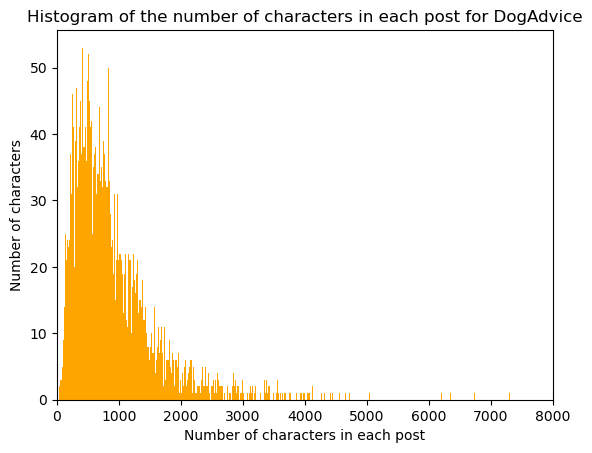

In [30]:
# Histogram of the number of characters in each post

plt.hist(dog_adv.len_title_selftext, bins =1000, color='orange')
plt.xlabel('Number of characters in each post')
plt.ylabel('Number of characters')
plt.xlim(0,8000)
plt.title('Histogram of the number of characters in each post for DogAdvice')

plt.show()

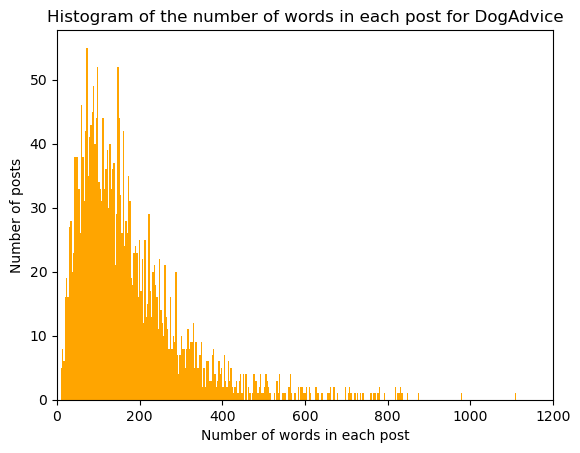

In [31]:
# Histogram of the number of words in each post

plt.hist(dog_adv.word_counts, bins =1000, color='orange')
plt.xlabel('Number of words in each post')
plt.ylabel('Number of posts')
plt.xlim(0,1200)
plt.title('Histogram of the number of words in each post for DogAdvice')

plt.show()

##### Interpretation for histograms for characters and words in each post for DogAdvice

- Both histograms are right-skewed distribution, similar pattern to the posts on CatAdvice. There might be correlation with attention span and how much each individual is willing to spend time on writing a post. There are outliers with long posts.

In [32]:
# Sort the df based on word_counts
dog_adv_sorted = dog_adv.sort_values(by=['word_counts'])

In [33]:
# Display rows with the least word counts
dog_adv_sorted[['title_selftext']].head()

title_selftext
1660  Today I made this design, rate please &amp;#x200B;\n\nhttps://preview.redd.it/q3i1wzsz05u91.jpg?width=4500&amp;format=pjpg&amp;auto=webp&amp;s=3976d7707e51cb233913a4efb32a9c472208007d
3947                                                                                                                                                  Is my boi the best boi? Yes. Yes he is.
2220                                                                                                                                       Fleas. Any advice on how to get of fleas for good.
1020                                                                                                                    Confidence Building What are some ways to build confidence in my dog?
365                                                             A should have! Check out this item in my Etsy shop https://www.etsy.com/listing/1333299278/pet-sitter-planner-journal-for-pet

In [34]:
# Display rows with the most word counts
dog_adv_sorted[['title_selftext']].tail()

title_selftext
2165  Requesting care tips for a stage 5 IVDD Dachshund/Pit Bull mix I'm long-winded; skip to TL;DR at the bottom if reading a lot aggravates you.\n\n&amp;#x200B;\n\nWe Have a Dachshund/Pit Bull mix who has recently been diagnosed with stage 5 Intervertebral Disc Disease. He'd had a spinal injury before, following a big jump while we were out on a trail, and, at vet's advisement, we dealt with it by...
3159  this is a very long read but I'm desperate for advice please help   Someone please help. I don't know what to do at this point. I love dogs and lost my baby of 18 years in two years ago. She was the best dog, got her when I was 2 and she had no problems whatsoever. She was a smaller dog (min pin Chihuahua). Fast forward to when she passed. I was very lonely and looking to adopt. I looked all o...
1918  My neighbor won’t stop feeding my dogs through our fence Here’s photos of our backyard to show the gaps in our fence and give a visual for what I’m describing:\n\nhttps://imgur.com/a/g00CTwS\n\nBasically, I need both neighbor advice and dog advice.\n\n1. How can I continue to attempt to use positive reinforcement to get my dog not to bark as much when by neighbor gives her attention despite he...
2766  Am I doing the right thing for my senior rescue dog? This is my first reddit post and it's a really long essay so I hope I'm not being a bother. I've consulted close friends and family who all say the same thing, but I'm curious what completely objective internet people think of my current predicament. Read on if you feel so inclined.\n\nI moved to the West Coast a few years ago for a job and ...
3441  Please Help. Rehomed rescue dog, not sure if I made the right choice. This is the worst pain I've ever felt. Hey all, this is going to be a bit of a long one but please please stick through it.\n\n2 weeks ago, me and my partner of 2 years, seen this gorgeous dog on a Shelter website, we had agreed to wait until October time before we started looking but my partner seen him and was absolutely s...

##### Interpretation for posts with least number of words and most number of words
- posts with too little words are more likely to not have sufficient information.
- posts with too many words are more likely to have too many irrelevant information.

In [35]:
## To reduce the number of posts to 2300 
## so as to standardise the number of posts to be same with the number of posts from CatAdvice
## by removing tail ends of the posts based on word counts
## Rationale: 
## - posts with too little words are more likely to not have sufficient information
## - posts with too many words are more likely to have too many irrelevant information

# Save trimmed df with only 2300 posts by filtering out the tail ends based on word counts
dog_adv_trim = dog_adv_sorted[185:2485]

In [36]:
# Display number of rows and columns after trimming
dog_adv_trim.shape

(2300, 84)

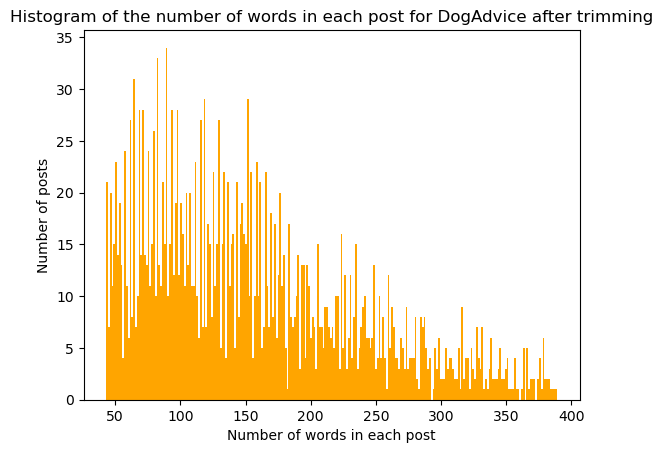

In [37]:
# Histogram of the number of words in each post after trimming

plt.hist(dog_adv_trim.word_counts, bins = 250, color='orange')
plt.xlabel('Number of words in each post')
plt.ylabel('Number of posts')
plt.title('Histogram of the number of words in each post for DogAdvice after trimming')

plt.show()

In [38]:
# clean text by removing punctuation, replacing '\n' with ' ' and lowercase
dog_adv_trim['cleaned_text'] = dog_adv_trim['title_selftext'].apply(lambda x: clean_text(x))

In [39]:
# Display first 5 rows of dog_adv_trim with relevant information
dog_adv_trim[['subreddit','link_flair_text','title_selftext','len_title_selftext','word_counts',
              'cleaned_text','subreddit_target']].head()

subreddit link_flair_text  \
538   DogAdvice             NaN   
2498  DogAdvice        Question   
3177  DogAdvice             NaN   
3773  DogAdvice          Advice   
2822  DogAdvice             NaN   

                                                                                                                                                                                                                                                        title_selftext  \
538   Adequan or Laser experience for arthritis? Anyone had results from Adequan and/or laser treatments for arthritis in their dog? He's young so we want to preserve and improve joint function as much as possible. I'm thinking about doing both at the same time.   
2498      Bladder stones My 4 year old chihuahua mix had surgery 4 weeks ago to remove bladder stones. She is now on the royal canine urinary food. Does anyone have recommendations on treats? The royal canine urinary treats have been sold out everywhere. Thanks!   
3177                                                       Dog never fully finishes meals How can I avoid my dog grazing. She never eats all her food in one sitting. I give her 1.5 cups in the morning (7 am ish), 1 cup at lunch (noon) and 1.5 cups at night (6pm)   
3773                      Dog Food Performatrin Has anyone ever used the brand Performatrin for a dog with food allergies ? I don’t like feeding grain free. They have one with fish as the main source of protein. Wondering what luck anyone has had with this line.   
2822                                  Advice: My puppy asked to go outside to pee but it’s raining. She went outside immediately walked inside and peed on the floor. How do I get her to pee outside even if it’s raining? I don’t have puppy pads, any ideas please?   

      len_title_selftext  word_counts  \
538                  256           43   
2498                 252           43   
3177                 203           43   
3773                 236           43   
2822                 224           43   

                                                                                                                                                                            cleaned_text  \
538                adequan laser experience arthritis anyone result adequan andor laser treatment arthritis he young want preserve improve joint function much possible im thinking time   
2498  bladder stone year old chihuahua mix surgery week ago remove bladder stone royal canine urinary food anyone recommendation treat royal canine urinary treat sold everywhere thanks   
3177                                                                  never fully finish meal avoid grazing never eats food one sitting give cup morning ish cup lunch noon cup night pm   
3773                                  food performatrin anyone ever used brand performatrin food allergy like feeding grain free one fish main source protein wondering luck anyone line   
2822                                      advice puppy asked go outside pee raining went outside immediately walked inside peed floor get pee outside even raining puppy pad idea please   

      subreddit_target  
538                  0  
2498                 0  
3177                 0  
3773                 0  
2822                 0

## Exploratory Data Analysis and Visualisation

To explore if there are any interesting relationships in the data, detect outliers and errors, examine any assumptions about the data, and prepare for modeling.

#### EDA for CatAdvice

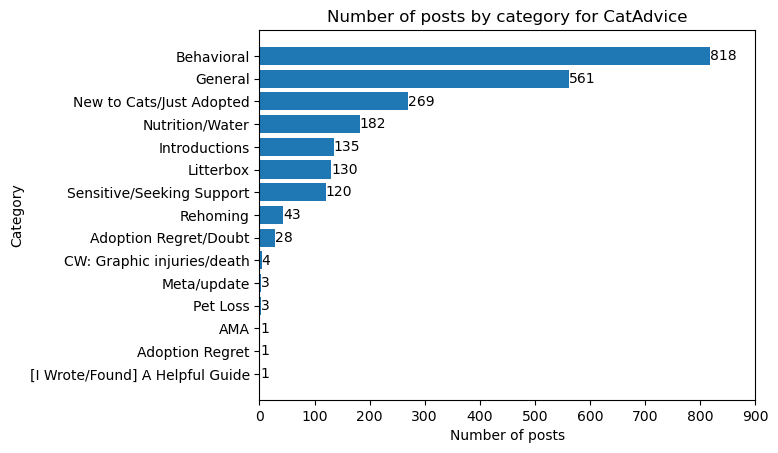

In [40]:
# Horizontal barchart of number of posts by category

fig, ax = plt.subplots()

cat_category_names = cat_adv_trim.link_flair_text.value_counts(ascending=True).index
cat_num_of_posts = cat_adv_trim.link_flair_text.value_counts(ascending=True)

ax.barh(cat_category_names, cat_num_of_posts)
plt.title('Number of posts by category for CatAdvice')
plt.xlabel('Number of posts')
plt.ylabel('Category')

plt.xlim(0,900)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

##### Interpretation for the number of posts by category for CatAdvice
- Top 3 categories of the queries are behavioral, new to cats/just adopted and nutrition/water (excluding posts under general)

In [41]:
## Histogram of word counts by category for catadvice

plt.figure(figsize = (20, 20), dpi=1200)

# list of catadvice categories with more than 25 posts
cat_category_list = cat_adv_trim.link_flair_text.value_counts(ascending=False).index[0:9]

for n in range(len(cat_category_list)):

    plt.subplot(3,3,(n+1))
    plt.hist(cat_adv_trim[cat_adv_trim.link_flair_text == cat_category_list[n]]['word_counts']) 
    plt.xlabel('Number of words in post');
    plt.ylabel('Frequency');
    plt.xlim(0,450)
 #   plt.ylim(0,160)
    plt.title(f"Histogram of number of words in post for {cat_category_list[n]}")
    
plt.show()

<Figure size 640x480 with 0 Axes>

##### Interpretation for histograms on the categories from CatAdvice
- All of the histograms, except the posts on 'Adoption Regret/Doubt' are right-skewed distribution
- 'Adoption Regret/Doubt' distribution is slightly left skewed. Could be because of low sample number or could be becuase the topic is more emotional and people tends to write more to share their feelings.  

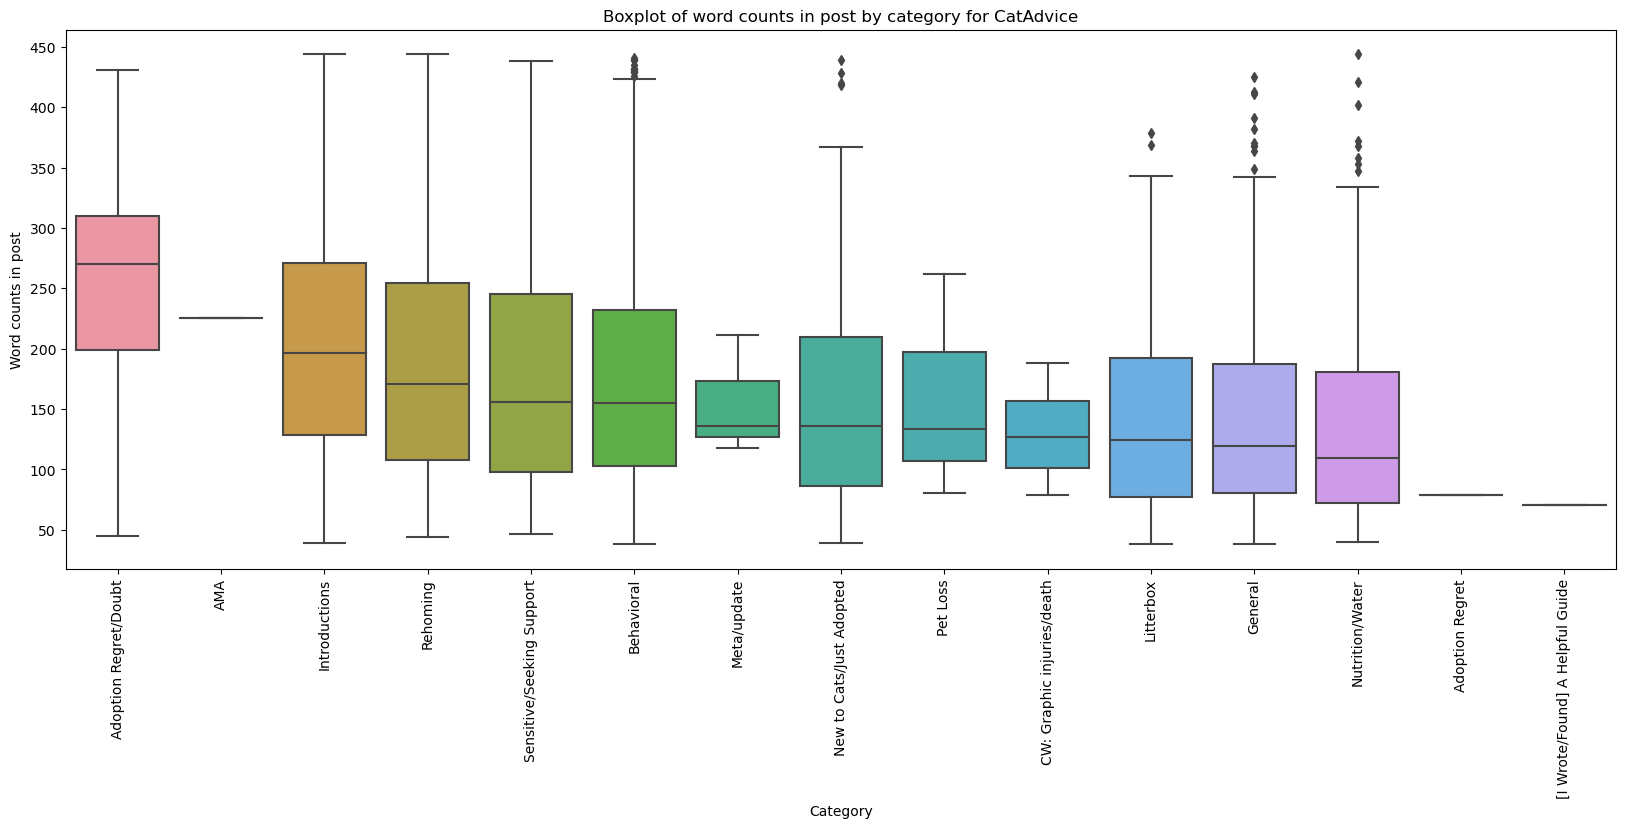

In [42]:
# Boxplot of word counts in post by category for catadvice

plt.figure(figsize = (20,7))

my_order = cat_adv_trim.groupby(by=['link_flair_text'])['word_counts'].median().sort_values(ascending=False).index

sns.boxplot(x=cat_adv_trim.link_flair_text, y=cat_adv_trim.word_counts, data=cat_adv_trim, order=my_order)
plt.xlabel(f'Category');
plt.xticks(rotation = 90)
plt.ylabel('Word counts in post');
plt.title(f"Boxplot of word counts in post by category for CatAdvice")    

plt.show()

 ##### Interpretation for the boxplot on the category for CatAdvice
- 'Adoption Regret/Doubt' has the highest median than the rest. Could be because the topic is more emotional and people tends to write more to share their feelings.  


In [43]:
# Number of unique users
cat_adv_trim.author.value_counts()

uthplot                 15
billyandteddy            7
fatchubbypupper          6
rkshea                   6
Mysterious_Relief738     6
                        ..
Softandpainful           1
Numerous-Moose615        1
crazyslothlady620        1
Ceridwen_POW             1
No-Tale-7066             1
Name: author, Length: 2050, dtype: int64

##### Interpretation on the number of unique users
- Most are unique users. 

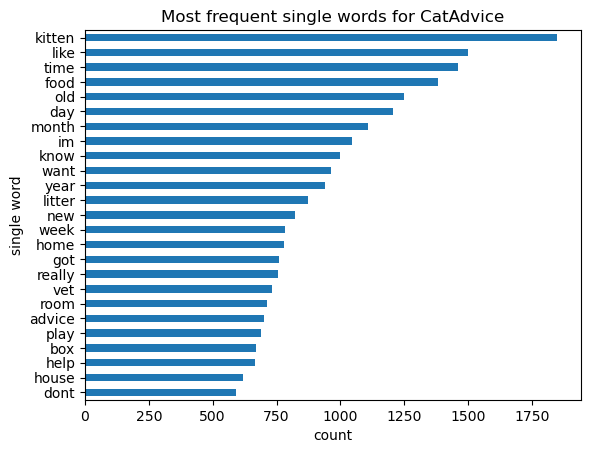

In [44]:
# Unigram for CatAdvice

cv_unigram_cat = CountVectorizer(stop_words='english', min_df=1)
cv_unigram_cat.fit(cat_adv_trim.cleaned_text)

unigram_cv_cat = cv_unigram_cat.transform(cat_adv_trim.cleaned_text)
unigram_cat_df = pd.DataFrame(unigram_cv_cat.todense(), columns=cv_unigram_cat.get_feature_names_out())

unigram_cat_df.sum().sort_values(ascending=False).head(25).sort_values(ascending=True).plot(kind='barh')
plt.title('Most frequent single words for CatAdvice')
plt.ylabel('single word')
plt.xlabel('count')
plt.show()

##### Interpretation for unigram for CatAdvice
- These words are expected. Generally, pet owners are concerned on health of their pets. 
- Words that are probably unique to cats are litter and box. 

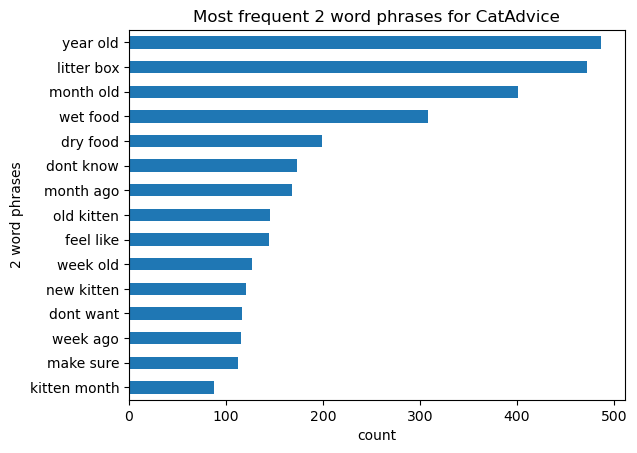

In [45]:
# Bigram for CatAdvice

cv_bigrams_cat = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams_cat.fit(cat_adv_trim.cleaned_text)

bigrams_cv_cat = cv_bigrams_cat.transform(cat_adv_trim.cleaned_text)
bigrams_cat_df = pd.DataFrame(bigrams_cv_cat.todense(), columns=cv_bigrams_cat.get_feature_names_out())

bigrams_cat_df.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind='barh')
plt.title('Most frequent 2 word phrases for CatAdvice')
plt.ylabel('2 word phrases')
plt.xlabel('count')
plt.show()

##### Interpretation for bigram for CatAdvice
- These words are expected. Generally, pet owners are concerned on health of their pets. 
- Phrases that are probably unique to cats are litter box and wet/dry food.

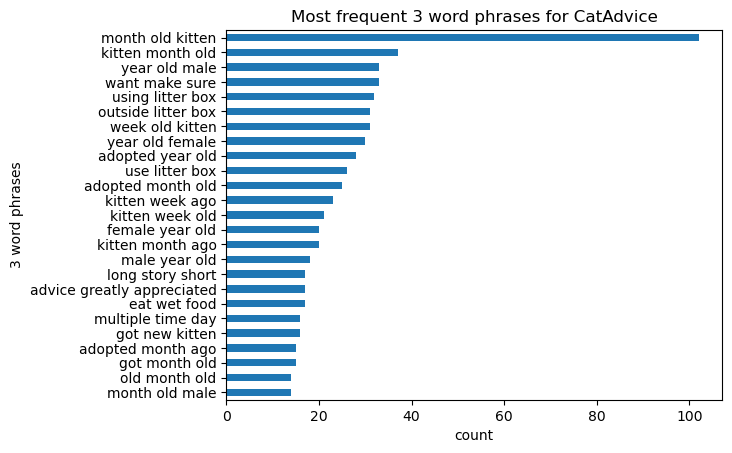

In [46]:
# Trigram for CatAdvice

cv_trigrams_cat = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams_cat.fit(cat_adv_trim.cleaned_text)

trigrams_cv_cat = cv_trigrams_cat.transform(cat_adv_trim.cleaned_text)
trigrams_cat_df = pd.DataFrame(trigrams_cv_cat.todense(), columns=cv_trigrams_cat.get_feature_names_out())

trigrams_cat_df.sum().sort_values(ascending=False).head(25).sort_values(ascending=True).plot(kind='barh')
plt.title('Most frequent 3 word phrases for CatAdvice')
plt.ylabel('3 word phrases')
plt.xlabel('count')
plt.show()

##### Interpretation for trigram for CatAdvice
- These words are expected. Generally, pet owners are concerned on health of their pets. 
- Phrases that are probably unique to cats are use litter box

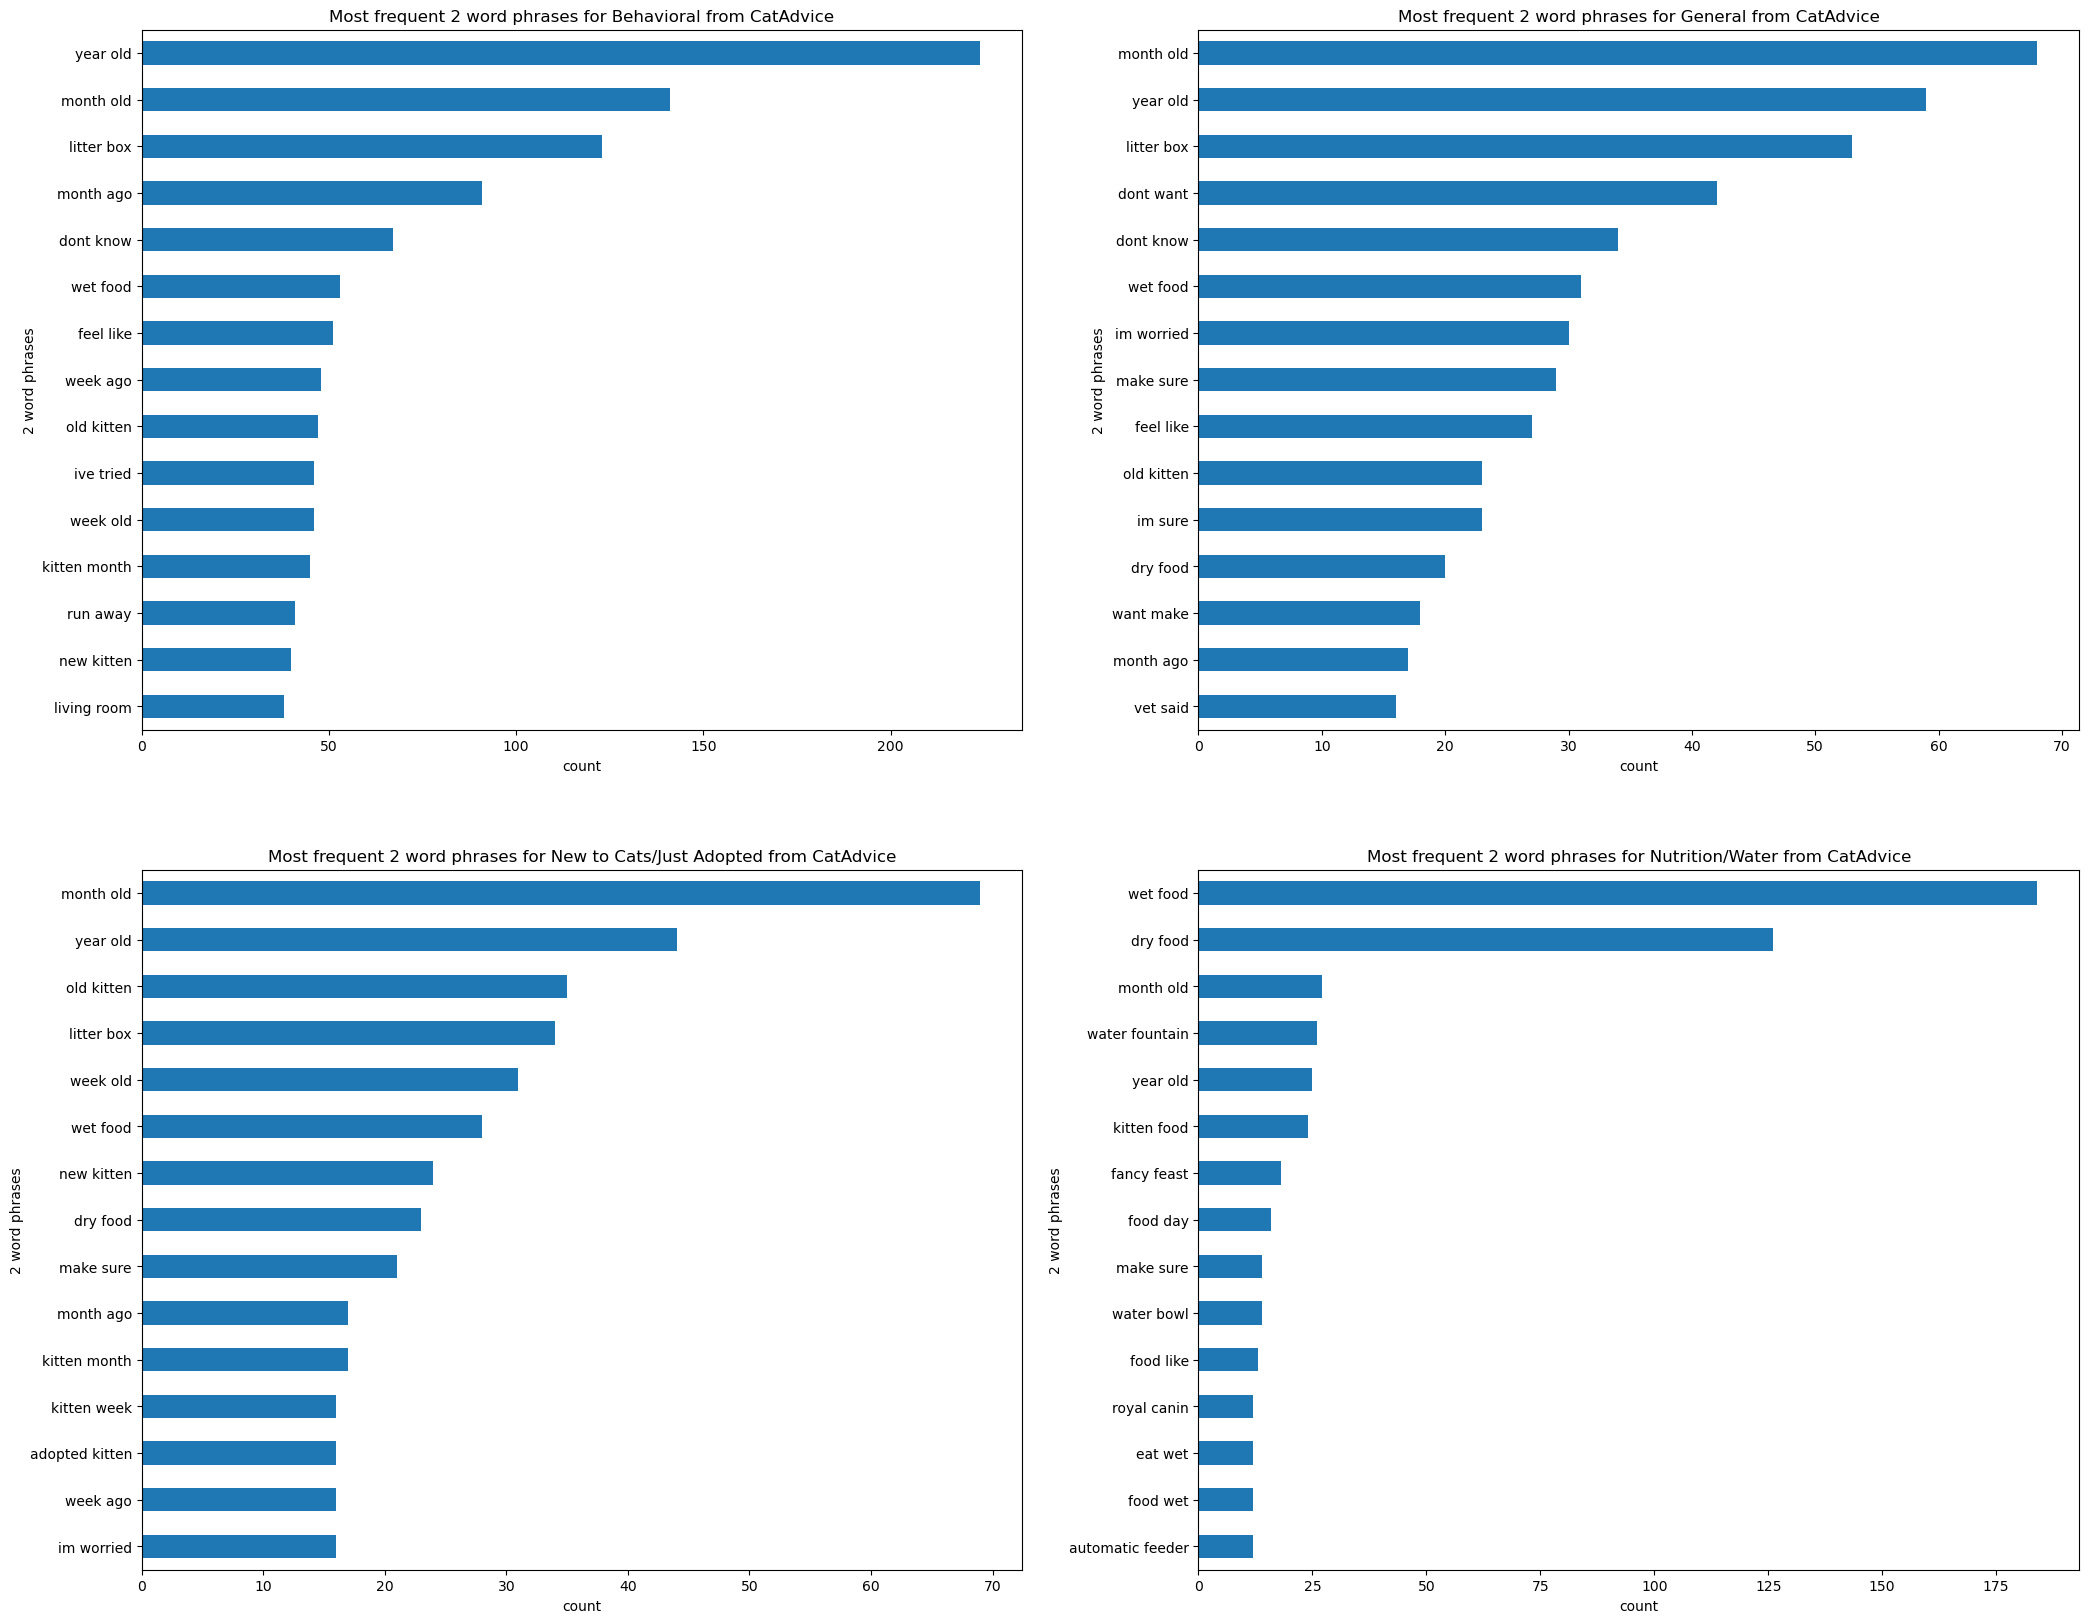

In [47]:
## Bigram by category for catadvice (top 4 categories)

plt.figure(figsize = (25, 20))

for n in range(4):
    plt.subplot(2,2,(n+1))
    cv_bigram_by_cat = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=1)
    cv_bigram_by_cat.fit(cat_adv_trim[cat_adv_trim.link_flair_text == cat_category_list[n]].cleaned_text)

    bigram_cv_cat = cv_bigram_by_cat.transform(cat_adv_trim[cat_adv_trim.link_flair_text == cat_category_list[n]].cleaned_text)
    bigram_cat_df = pd.DataFrame(bigram_cv_cat.todense(), columns=cv_bigram_by_cat.get_feature_names_out())

    bigram_cat_df.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Most frequent 2 word phrases for {cat_category_list[n]} from CatAdvice')
    plt.ylabel('2 word phrases')
    plt.xlabel('count')
     
plt.show()

##### Interpretation for bigram for CatAdvice by categories
- There is not much difference between categories on the common phrases.
- The common phrases revolve around litter box and wet/dry food.

#### EDA for DogAdvice

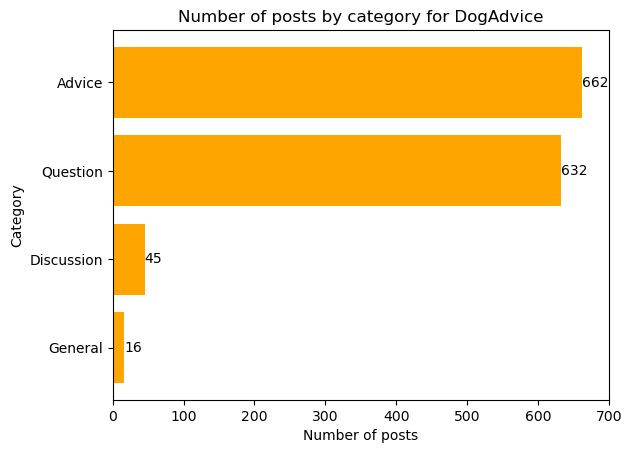

In [48]:
# Horizontal barchart of number of posts by category

fig, ax = plt.subplots()

dog_category_names = dog_adv_trim.link_flair_text.value_counts(ascending=True).index
dog_num_of_posts = dog_adv_trim.link_flair_text.value_counts(ascending=True)

ax.barh(dog_category_names, dog_num_of_posts, color='orange')
plt.title('Number of posts by category for DogAdvice')
plt.xlabel('Number of posts')
plt.ylabel('Category')

plt.xlim(0,700)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

##### Interpretation for the number of posts by category for DogAdvice
- Chart is not very useful since not all posts were labelled. Approx. 50% of posts were not labelled
- Advice and question seem to have similar posts.

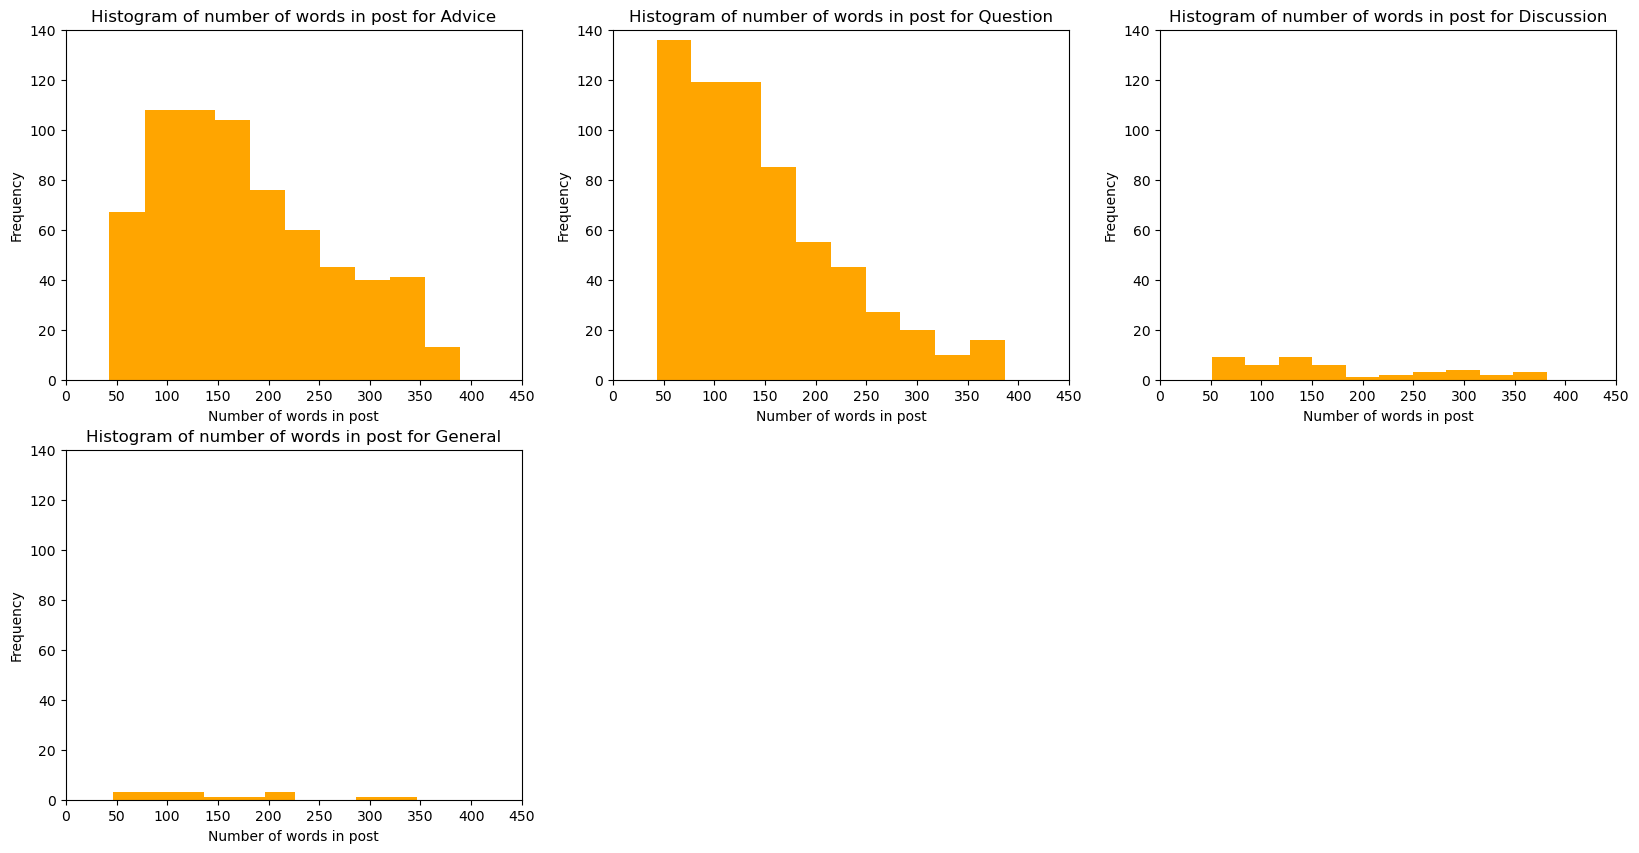

In [49]:
## Histogram of word counts by category for dogadvice

plt.figure(figsize = (20, 10))

# list of dogadvice categories
dog_category_list = dog_adv_trim.link_flair_text.value_counts(ascending=False).index

for n in range(len(dog_category_list)):

    plt.subplot(2,3,(n+1))
    plt.hist(dog_adv_trim[dog_adv_trim.link_flair_text == dog_category_list[n]]['word_counts'], color='orange') 
    plt.xlabel('Number of words in post');
    plt.ylabel('Frequency');
    plt.xlim(0,450)
    plt.ylim(0,140)
    plt.title(f"Histogram of number of words in post for {dog_category_list[n]}")
    
plt.show()
         

##### Interpretation for histograms on the categories from DogAdvice
- Expected right-skewed distribution, which is consistent with overall distribution.

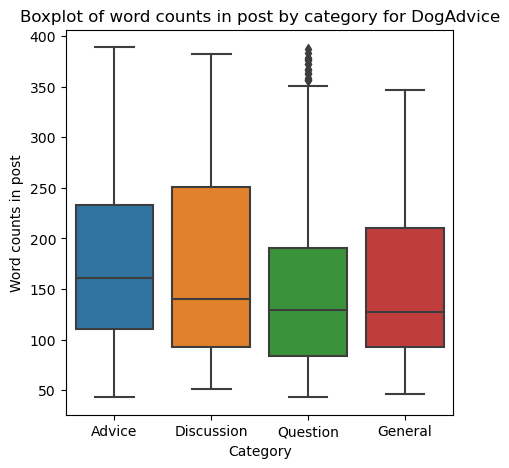

In [50]:
# Boxplot of word counts in post by category for DogAdvice

plt.figure(figsize = (5,5))

my_order = dog_adv_trim.groupby(by=['link_flair_text'])['word_counts'].median().sort_values(ascending=False).index

sns.boxplot(x=dog_adv_trim.link_flair_text, y=dog_adv_trim.word_counts, data=dog_adv_trim, order=my_order)
plt.xlabel(f'Category');
plt.ylabel('Word counts in post');
plt.title(f"Boxplot of word counts in post by category for DogAdvice")    

plt.show()

##### Interpretation for the boxplot on the category for DogAdvice
- Median between categories is similar, which is expected since the categories are similar.

In [51]:
# Number of unique users
dog_adv_trim.author.value_counts()

hewlppls                17
Zalaya                  12
Robbie1863               7
Radiant_Signal_8637      7
krzeslodobiurka          6
                        ..
Gay-and-autistic         1
ForwardDimension9046     1
ashleyh20s               1
anunforgivingfantasy     1
princesscryybabyyy       1
Name: author, Length: 2004, dtype: int64

##### Interpretation on the number of unique users
- Most are unique users. 

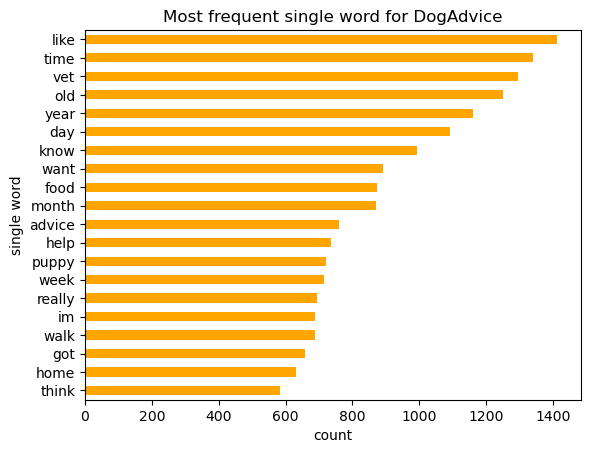

In [52]:
# Unigram for DogAdvice

cv_unigram_dog = CountVectorizer(stop_words='english', min_df=1)
cv_unigram_dog.fit(dog_adv_trim.cleaned_text)

unigram_cv_dog = cv_unigram_dog.transform(dog_adv_trim.cleaned_text)
unigram_dog_df = pd.DataFrame(unigram_cv_dog.todense(), columns=cv_unigram_dog.get_feature_names_out())

unigram_dog_df.sum().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh', color='orange')
plt.title('Most frequent single word for DogAdvice')
plt.ylabel('single word')
plt.xlabel('count')
plt.show()

##### Interpretation for unigram for DogAdvice
- These words are expected. Generally, pet owners are concerned on health of their pets. 
- Words that are probably unique to dog are walk. Walking the dog is important as it provides mental stimulation, physical exercise, chances for socialization, and opportunities for behavioral training to dogs.

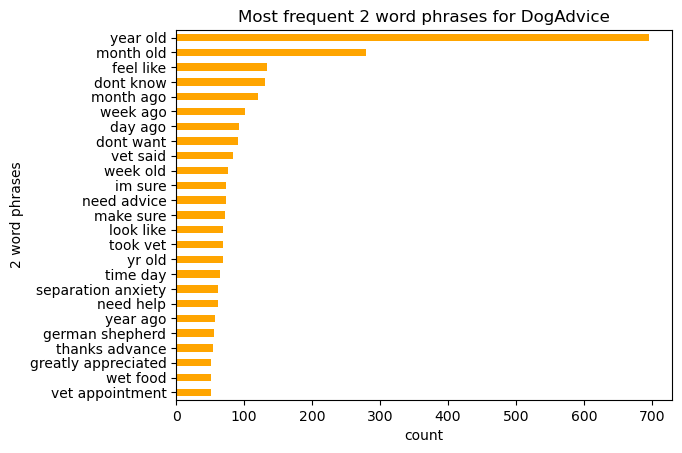

In [53]:
# Bigram for DogAdvice

cv_bigrams_dog = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams_dog.fit(dog_adv_trim.cleaned_text)

bigrams_cv_dog = cv_bigrams_dog.transform(dog_adv_trim.cleaned_text)
bigrams_dog_df = pd.DataFrame(bigrams_cv_dog.todense(), columns=cv_bigrams_dog.get_feature_names_out())

bigrams_dog_df.sum().sort_values(ascending=False).head(25).sort_values(ascending=True).plot(kind='barh', color='orange')
plt.title('Most frequent 2 word phrases for DogAdvice')
plt.ylabel('2 word phrases')
plt.xlabel('count')
plt.show()

##### Interpretation for bigram for DogAdvice
- These words are expected. Generally, pet owners are concerned on health and age of their pets. 
- Words that are probably unique to dog are separation anxiety and german shepherd (common dog breed in America).

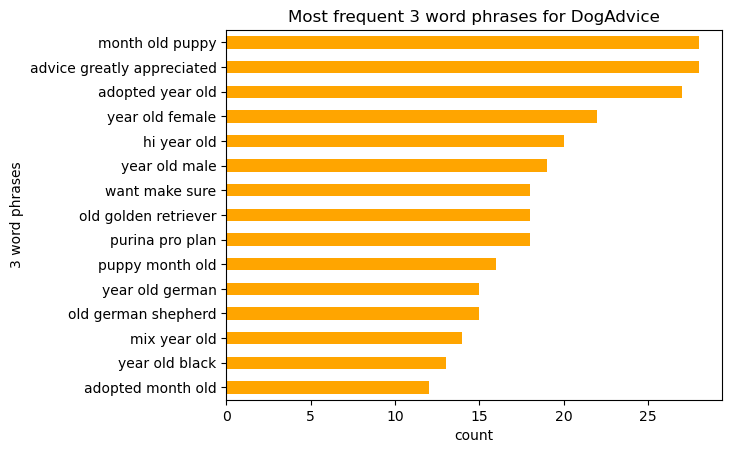

In [54]:
# Trigram for DogAdvice

cv_trigrams_dog = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams_dog.fit(dog_adv_trim.cleaned_text)

trigrams_cv_dog = cv_trigrams_dog.transform(dog_adv_trim.cleaned_text)
trigrams_dog_df = pd.DataFrame(trigrams_cv_dog.todense(), columns=cv_trigrams_dog.get_feature_names_out())

trigrams_dog_df.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind='barh', color='orange')

plt.title('Most frequent 3 word phrases for DogAdvice')
plt.ylabel('3 word phrases')
plt.xlabel('count')
plt.show()

##### Interpretation for trigram for DogAdvice
- These words are expected. Generally, pet owners are concerned on health and age of their pets. 
- Words that are probably unique to dog are 'old golden retriever' and 'old german shepherd' (dog breeds).

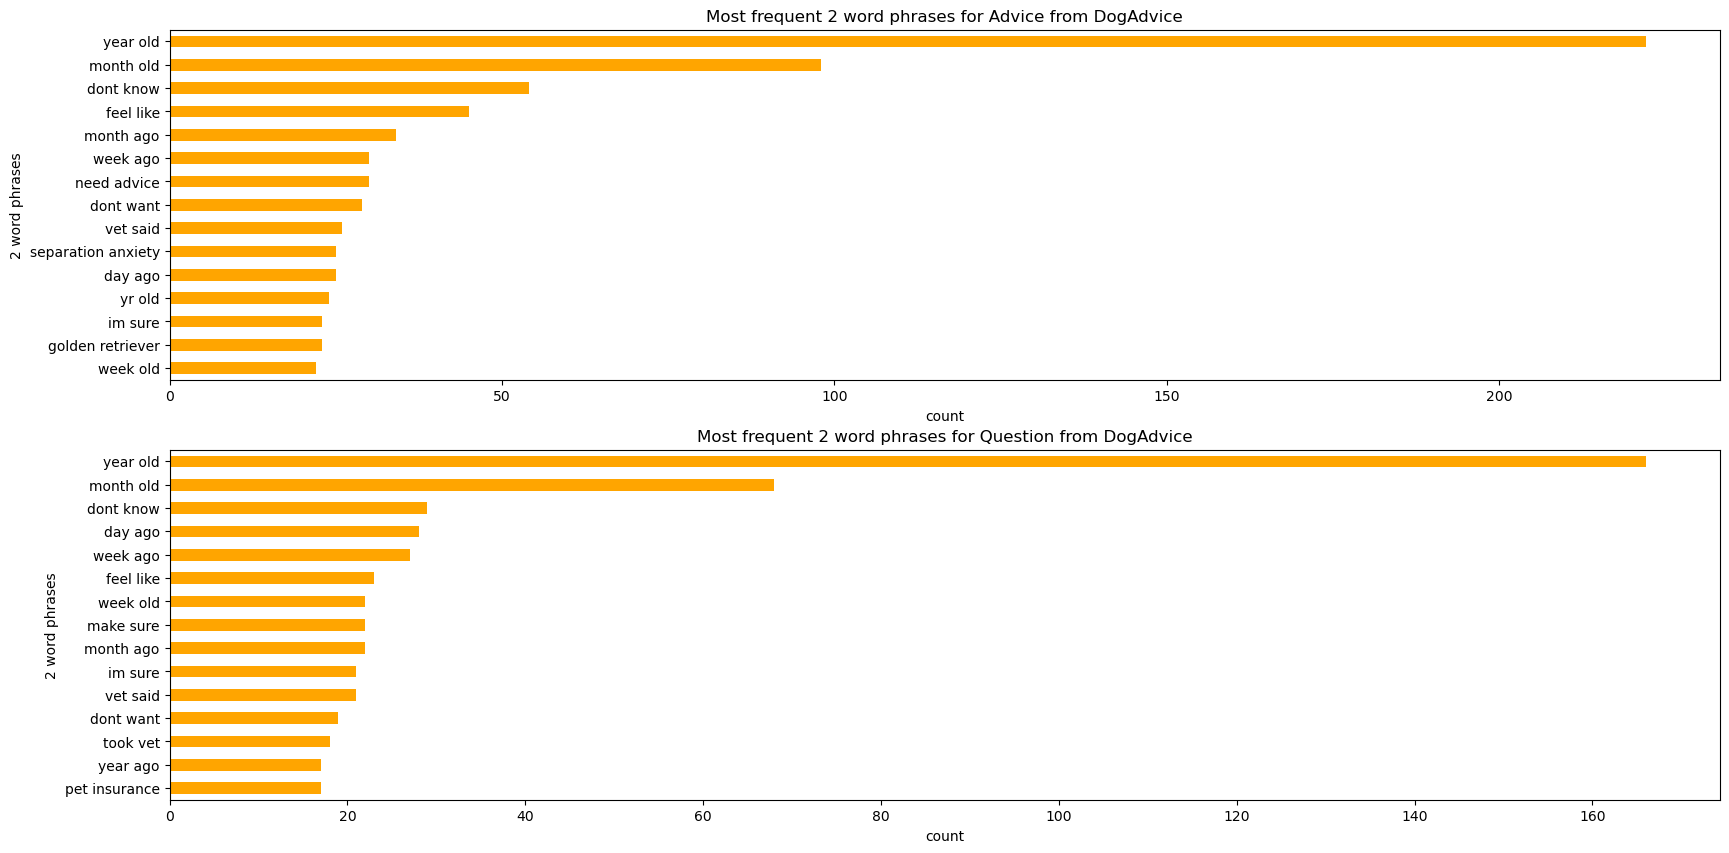

In [55]:
## Bigram by category for dogadvice (top 2 categories)

plt.figure(figsize = (20, 10))

for n in range(2):
    plt.subplot(2,1,(n+1))
    cv_bigram_by_cat = CountVectorizer(ngram_range=(2, 2), stop_words='english', min_df=1)
    cv_bigram_by_cat.fit(dog_adv_trim[dog_adv_trim.link_flair_text == dog_category_list[n]].cleaned_text)

    bigram_cv_cat = cv_bigram_by_cat.transform(dog_adv_trim[dog_adv_trim.link_flair_text == dog_category_list[n]].cleaned_text)
    bigram_cat_df = pd.DataFrame(bigram_cv_cat.todense(), columns=cv_bigram_by_cat.get_feature_names_out())

    bigram_cat_df.sum().sort_values(ascending=False).head(15).sort_values(ascending=True).plot(kind='barh', color='orange')
    plt.title(f'Most frequent 2 word phrases for {dog_category_list[n]} from DogAdvice')
    plt.ylabel('2 word phrases')
    plt.xlabel('count')
     
plt.show()

##### Interpretation for bigram for DogAdvice by categories
- Not much differences in the common words between categories. This is expected as the category is similar. 

#### Save cleaned and relevant data in csv for modelling in part 3

In [56]:
## Select relevant columns for cleaned CatAdvice

# Save relevant columns to df
cat_adv_cleaned = cat_adv_trim[['subreddit','link_flair_text','title_selftext','cleaned_text','subreddit_target']]

# Rearrange df by index - df no longer sorted by word_counts
cat_adv_cleaned.sort_index(inplace=True)

In [57]:
# Display first 5 rows
cat_adv_cleaned.head()

subreddit            link_flair_text  \
0   CatAdvice                    General   
4   CatAdvice                 Behavioral   
9   CatAdvice                 Behavioral   
10  CatAdvice  Sensitive/Seeking Support   
11  CatAdvice              Introductions   

                                                                                                                                                                                                                                                                                                                                                                                                     title_selftext  \
0   Transporting cats on a 3.5 hr drive to move to a new place??? Best way to make them comfortable? I have 2 cats and 2 carriers but I feel the carriers are a little small for such a long drive. It's fine when they go to the vet who is close. One cat is 14lbs the other is 20, we have the largest cat carriers we could find. Do they need to potty or have food/water for a long drive? Or will they be...   
4   Cat bullying? I recently adopted an 8 week old kitten (Susan) &amp; brought her home to my apartment. I currently live with my partner &amp; his 2 year old cat (Fork). I did my best to take things slow but my partner is a little less… cautious than I am, so they met fairly quickly and after a bit of hissing from Fork he quietened down. \n\nNow, my concern is this. Fork is a big cat and he’s no...   
9   Need advice on an anxious kitty as a first time owner. Tldr at bottom\n\nIm a first time cat owner to a loveley 2yr old tabby we will call Cat. I absolutely adore Cat she looks so cute and always wants to be pet or sleep, but she is also very very anxious. Today was supposed to be her first vet appointment but I messed up and couldnt get her in a harness. Shortly after, I failed to grab Cat up...   
10  Cat jealousy issue Do cats really love you? I've had 3 kittens for a little over a year. 2 of my cats act super loving toward me- they always cuddle, want to be pet, follow me around all the time, so much purring, kneading me, sleep on me every night, cry every time I close the door to the bathroom, etc! I love them so much and think the world of them! The other one is so sweet, just not as cu...   
11  Introducing Cats When One is Deaf My husband and I each moved into our new home a year ago with our cats: Toby (14+ yo, and completely deaf) and Moxie (5ish yo). We have tried to introduce them multiple times with the Jackson Galaxy method. It just doesn't seem to work because when Moxie hisses or growls, Toby straight up cannot tell and continues getting up in her face. He definitely wants to...   

                                                                                                                                                                                                                                                                                                                                                                                                       cleaned_text  \
0   transporting hr drive move new place best way make comfortable carrier feel carrier little small long drive fine go vet close one lb largest carrier could find need potty foodwater long drive stressed large scream loud hr straight break record thus far start screaming soon get carrier closed people car especially driver keep sane calm screaming get new place help adjust new home screamer like ...   
4   bullying recently adopted week old kitten susan brought home apartment currently live partner year old fork best take thing slow partner little le cautious met fairly quickly bit hissing fork quietened concern fork big well socialised opinion affectionate rarely come near u shy new situation quite energetic best play provide mental stimulation never tire try play kitten quite rough also never ...   
9   need advice anxious kitty first time owner tldr bottom im first time ow

In [58]:
## Select relevant columns for cleaned CatAdvicecleaned DogAdvice

# Save relevant columns to df
dog_adv_cleaned = dog_adv_trim[['subreddit','link_flair_text','title_selftext','cleaned_text','subreddit_target']]

# Rearrange df by index - df no longer sorted by word_counts
dog_adv_cleaned.sort_index(inplace=True)

In [59]:
# Display first 5 rows
dog_adv_cleaned.head()

subreddit link_flair_text  \
0  DogAdvice             NaN   
1  DogAdvice          Advice   
3  DogAdvice        Question   
4  DogAdvice          Advice   
5  DogAdvice      Discussion   

                                                                                                                                                                                                                                                                                                                                                                                                    title_selftext  \
0  Urgent, need info asap Can anybody identify what this could possibly be? When I first adopted my dog about 3-4 months ago (Staffordshire Terrier) we noticed that she had this little branch off on her paw pad and thought nothing of it because it looked like just a minor paw abnormality at first. We noticed today after being out and playing that it has started to look like this and we aren’t sur...   
1  Behavior problems with corgi Hello all, I've been having serious behavioral problems with my 7M pembroke welsh corgi and he has been targeting my 13M Cairn terrier. We have had both dogs since they were 2-3 months old and though my corgi has always been "grumpy" he has never been aggressive with the cairn terrier. My cairn terrier is a very calm old man that is incontinent but never bothered a...   
3                                                                                                                                                           Pink eye? We have a vet appointment Monday, that’s all we could get. We’re going to get some sterile eye wash that the vet recommended. Any other remedies? It doesn’t seem to be bothering him but I feel bad for my poor boy. 11 month old Schnorgi.   
4  Will these dogs get along? Sorry, this might be kind of long.  I have 2 dogs, theyre big (about 90lbs) and they've gotten along really well. I've had my male dog for about 9 years and got him at 2 months old. He's very sweet and listens. I got my female dog about 2 years ago as a rescue. We're not sure how old she is but we're guessing about 5 years old.               Since we've had her shes ...   
5  Advice on prepping apt/ doggo for a smooth post surgery recovery oy where to start. Just want to avoid complications or stiches ripping etc etc etc. Not exactly sure how large this will be at the moment either. So I'm just prepping now best I can. \n\nIve seen surgical "suits" aka doggy onsies, old t shirts but  it says in comments for spay/ neuter surgeries. what about torso/ back-What would ...   

                                                                                                                                                                                                                                                                                                                                                                                                      cleaned_text  \
0                                                                                                             urgent need info asap anybody identify could possibly first adopted month ago staffordshire terrier noticed little branch paw pad thought nothing looked like minor paw abnormality first noticed today playing started look like sure tumor whatever could information would helpful thank guy time   
1  behavior problem corgi hello ive serious behavioral problem pembroke welsh corgi targeting cairn terrier since month old though corgi always grumpy never aggressive cairn terrier cairn terrier calm old man incontinent never bothered aside occasional food aggression treat im sure corgi ripped fur want take vet see there anything really want avoid euthanizing birthday present turned year old advice   
3                                                                                                                                                          

In [60]:
# Combine cat_adv_cleaned and dog_adv_cleaned to one df
pet_adv_cleaned = pd.concat([cat_adv_cleaned, dog_adv_cleaned], axis=0, ignore_index=True)

In [61]:
# rename column name of 'link_flair_text' to 'category'
pet_adv_cleaned = pet_adv_cleaned.rename(columns = {'link_flair_text':'category'})

In [62]:
# Save df to csv
pet_adv_cleaned.to_csv('../data/pet_adv_cleaned.csv', index = False)

## Data Dictionary

File
* [`pet_adv_cleaned.csv`](../data/pet_adv_cleaned.csv): Contains posts from r/CatAdvice and r/DogAdvice with and without cleaning

|Feature|Type|Dataset|Description|
|---|---|---|---|
|subreddit|*object*|pet_adv_cleaned|The name of the subreddit / data source (either r/CatAdvice or r/DogAdvice)|
|category|*object*|pet_adv_cleaned|The post's category tag obtained from the web subreddit|
|title_selftext|*object*|pet_adv_cleaned|The post's original text which includes the post's title and comment|
|cleaned_text|*object*|pet_adv_cleaned|The cleaned text of the post's title and comment|
|subreddit_target|*int*|pet_adv_cleaned|The numerical tag of the name of the subreddit/data source (1 refers to r/CatAdvice while 0 refers to r/DogAdvice)|